In [1]:
import xarray as xr 
import matplotlib.pyplot as plt

import numpy as np                 #for general calculations.

from matplotlib.animation import FuncAnimation  #creating animations and videos.
from IPython.display import Video, HTML         #embedding videos in the notebook

#this command allows interactive plots in noteboks
%matplotlib inline   
from pathlib import Path

import sys
sys.path.append("pipeline")

from get_raw_data import raw_data
from get_full_data import full_data

from get_masked_data import masked_data
from get_ids import ids

In [1]:
import pandas as pd

In [2]:
log1 = pd.read_csv('convlstm_sst_attempt_2023-07-17 00:38:20.303261_log.csv')

In [3]:
print(log1)

    epoch      loss      lr  val_loss
0       0  0.184172  0.0005  0.128902
1       1  0.096169  0.0005  2.106468
2       2  0.080532  0.0005  0.111431
3       3  0.066974  0.0005  0.134585
4       4  0.059133  0.0005  0.101291
5       5  0.050851  0.0005  0.061742
6       6  0.052977  0.0005  0.080046
7       7  0.042467  0.0005  0.064834
8       8  0.041724  0.0005  0.055693
9       9  0.038276  0.0005  0.053974
10     10  0.032787  0.0005  0.066960
11     11  0.039417  0.0005  0.108748
12     12  0.034963  0.0005  0.038196
13     13  0.027828  0.0005  0.045003
14     14  0.030130  0.0005  0.060285
15     15  0.029333  0.0005  0.047831
16     16  0.025233  0.0005  0.043211
17     17  0.023514  0.0005  0.058705
18     18  0.023709  0.0005  0.098889
19     19  0.031978  0.0005  0.111891
20     20  0.030773  0.0005  0.040009
21     21  0.019388  0.0001  0.036261
22     22  0.018424  0.0001  0.037595
23     23  0.017591  0.0001  0.034771
24     24  0.016994  0.0001  0.036546
25     25  0

Text(0.5, 1.0, 'Losses for ConvLSTM')

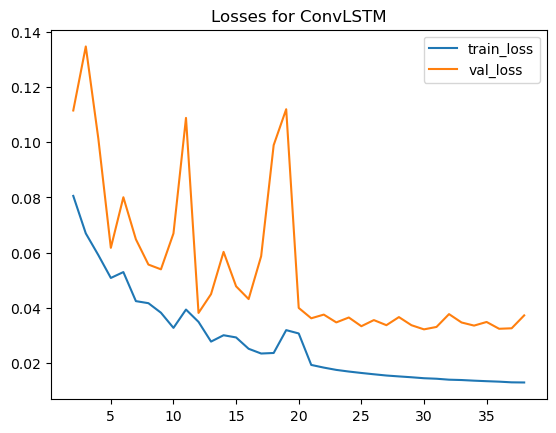

In [16]:
plt.plot(log1['epoch'].iloc[2:], log1['loss'].iloc[2:], label='train_loss')
plt.plot(log1['epoch'].iloc[2:], log1['val_loss'].iloc[2:], label='val_loss')
plt.legend()
plt.title('Losses for ConvLSTM')

In [17]:
log2 = pd.read_csv('convlstm_sst_attempt_2023-07-17 08:45:50.675928_log.csv')

Text(0.5, 1.0, 'Losses for ConvLSTM')

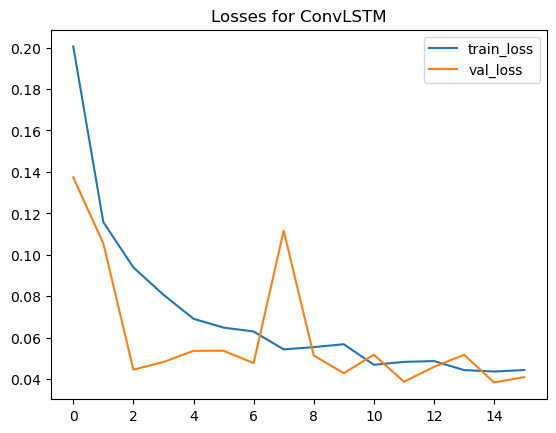

In [19]:
plt.plot(log2['epoch'], log2['loss'], label='train_loss')
plt.plot(log2['epoch'], log2['val_loss'], label='val_loss')
plt.legend()
plt.title('Losses for ConvLSTM')

Text(0.5, 1.0, 'Losses for ConvLSTM Compared')

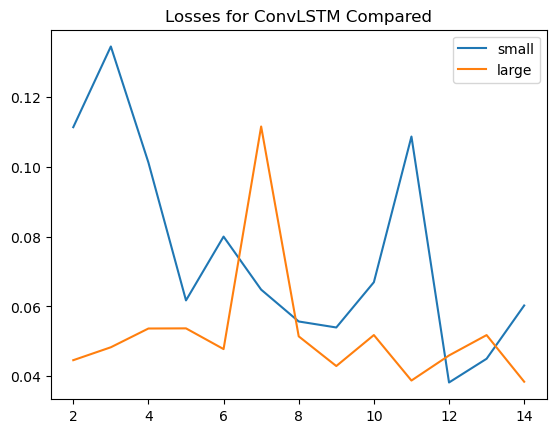

In [23]:
plt.plot(log1['epoch'].iloc[2:15], log1['val_loss'].iloc[2:15], label='small')
plt.plot(log2['epoch'].iloc[2:15], log2['val_loss'].iloc[2:15], label='large')
plt.legend()
plt.title('Losses for ConvLSTM Compared')

In [7]:
import matplotlib.pyplot as plt

In [2]:
from src.generators import *

2023-07-24 14:51:31.952914: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-24 14:51:32.027016: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
data_dir = 'data_size64_duration6_window2_4hourly'

In [4]:
list_ids = np.load(data_dir + '/train_ids.npy')

In [5]:
ds = get_src_dataset(data_dir, list_ids, window_size = 2)

2023-07-24 14:51:34.046091: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-24 14:51:34.083671: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-24 14:51:34.084315: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-24 14:51:34.085163: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFl

In [6]:
print(list_ids[100])

[ 1. 42.  4.]


TypeError: The dataset length is unknown.

In [29]:
np_ds = ds.as_numpy_iterator()

In [39]:
for i i
print(next(np_ds)[0].sum())

-638337.8


In [47]:
thing = iter(ds)

In [50]:
for batch in ds:
    print(batch[0].shape)

(12, 12, 64, 64)
(12, 12, 64, 64)
(12, 12, 64, 64)
(12, 12, 64, 64)
(12, 12, 64, 64)
(12, 12, 64, 64)
(12, 12, 64, 64)
(12, 12, 64, 64)
(12, 12, 64, 64)
(12, 12, 64, 64)
(12, 12, 64, 64)
(12, 12, 64, 64)
(12, 12, 64, 64)
(12, 12, 64, 64)
(12, 12, 64, 64)
(12, 12, 64, 64)
(12, 12, 64, 64)
(12, 12, 64, 64)


KeyboardInterrupt: 

In [45]:
print(tf.reduce_sum(next(thing)[0]))

tf.Tensor(-931399.1, shape=(), dtype=float32)


In [2]:
from src.models import *

2023-07-06 18:53:06.909361: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-06 18:53:07.059666: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [88]:
print(np.nansum([np.nan, np.nan]))

0.0


In [9]:
model = create_Zeros()

2023-07-06 18:55:15.977381: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-06 18:55:16.166042: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-06 18:55:16.166435: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-06 18:55:16.169171: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFl

In [5]:
model.load_weights('weights/convlstm_sst_attempt.h5')

In [3]:
from src.generators import *
def get_summary_stats(tile_stats):
    sum_0 = tile_stats[:, :, 0]
    sum_1 = tile_stats[:, :, 1]
    sum_2 = tile_stats[:, :, 2]
    
    final_num = np.sum(sum_0)
    if final_num == 0:
        final_mean = 0
        final_std = 1
    else:
        final_mean = np.nansum(sum_1)/final_num
        final_std = np.sqrt(np.nansum(sum_2)/final_num - (final_mean)**2)
    
    return (final_num, final_mean, final_std)

my_data_params = params()
data_dir = my_data_params['dataDir']

tile_stats = np.load(data_dir + '/masked_stats.npy')
stats = get_summary_stats(tile_stats)

train_ids = np.load(data_dir + '/train_ids.npy')
val_ids = np.load(data_dir + '/val_ids.npy')

train_gen = DataGenerator(list_IDs = train_ids, stats = stats, shuffle = True)
val_gen = DataGenerator(list_IDs = val_ids, stats = stats, shuffle = False)


In [4]:
from src.losses import *

In [5]:
print(stats)
stats = (stats[0], stats[1], stats[2])

(215695054.0, 300.2629121076177, 0.6458180705585166)


In [10]:
model.compile(loss = mse_loss, optimizer = keras.optimizers.Adam(learning_rate = 5e-4))

In [26]:
val_example = val_gen.__getitem__(15)
X = val_example[0]
Y = val_example[1]

296.78997802734375 301.5799865722656 296.78997802734375 301.5799865722656
296.78997802734375 301.5799865722656 296.78997802734375 301.5799865722656
296.78997802734375 301.5799865722656 296.78997802734375 301.5799865722656
296.78997802734375 301.5799865722656 296.78997802734375 301.5799865722656
296.78997802734375 301.5799865722656 296.78997802734375 301.5799865722656
296.78997802734375 301.5799865722656 296.78997802734375 301.5799865722656
296.78997802734375 301.5799865722656 296.78997802734375 301.5799865722656
296.78997802734375 301.5799865722656 296.78997802734375 301.5799865722656
296.78997802734375 301.5799865722656 296.78997802734375 301.5799865722656
296.78997802734375 301.5799865722656 296.78997802734375 301.5799865722656
296.78997802734375 301.5799865722656 296.78997802734375 301.5799865722656
296.78997802734375 301.5799865722656 296.78997802734375 301.5799865722656


In [ ]:
for i in range(val_gen.__len__()):
    val_example = val_gen.__getitem__(i)
    X = val_example[0]
    Y = val_example[1]
    print(np.nanmean(np.square(X)), np.nanmean(np.square(X)))
    print(np.nanmean(np.square(Y)), np.nanmean(np.square(Y)))
    print()

In [12]:
print(X.shape, Y.shape)

(12, 120, 64, 64) (12, 120, 64, 64)


In [17]:
print(np.nanmin(X), np.nanmin(Y), np.nanmax(X), np.nanmax(Y))

-5.640778095914716 -5.640778095914716 8.109229704474197 8.109229704474197


In [27]:
X_orig = np.zeros(X.shape)
X_orig[X != 0] = X[X != 0] * stats[2] + stats[1]
X_orig[X == 0] = np.nan
Y_orig = Y * stats[2] + stats[1]

In [28]:
print(np.nanmin(X_orig), np.nanmin(Y_orig), np.nanmax(X_orig), np.nanmax(Y_orig))

296.789978565101 296.789978565101 301.57998636832673 301.57998636832673


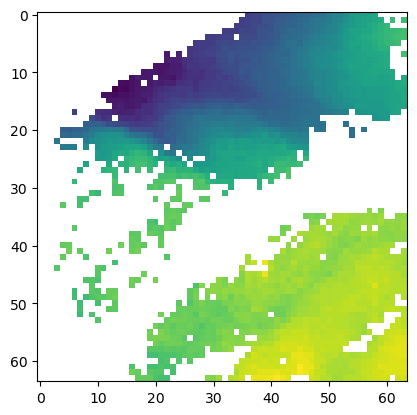

In [29]:
plt.imshow(Y_orig[10, 60, :, :])

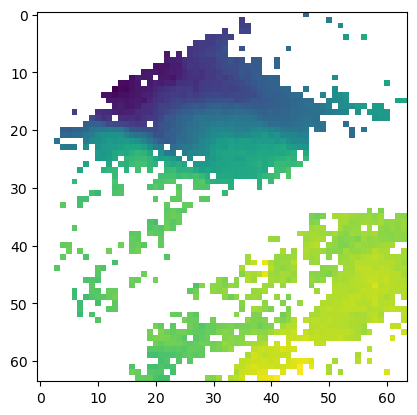

In [30]:
plt.imshow(X_orig[10, 60, :, :])

In [34]:
print(np.nanmin(X_orig), np.nanmax(X_orig), np.nanmin(Y_orig), np.nanmax(Y_orig))

296.789978565101 301.57998636832673 296.789978565101 301.57998636832673


In [31]:
Y_pred = model.predict(X)

1/1 [==============================] - 0s 292ms/step


In [14]:
print(X.shape, Y.shape, Y_pred.shape)

NameError: name 'Y_pred' is not defined

In [33]:
Y_pred = tf.reshape(Y_pred, X.shape)
print(mse_loss(Y, tf.cast(Y_pred, 'float32')))

2023-07-06 18:59:02.317644: W tensorflow/core/common_runtime/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 45.00MiB (rounded to 47185920)requested by op SelectV2
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-07-06 18:59:02.318213: I tensorflow/core/common_runtime/bfc_allocator.cc:1033] BFCAllocator dump for GPU_0_bfc
2023-07-06 18:59:02.318227: I tensorflow/core/common_runtime/bfc_allocator.cc:1040] Bin (256): 	Total Chunks: 11, Chunks in use: 11. 2.8KiB allocated for chunks. 2.8KiB in use in bin. 64B client-requested in use in bin.
2023-07-06 18:59:02.318237: I tensorflow/core/common_runtime/bfc_allocator.cc:1040] Bin (512): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2023-07-06 18:59:02.318246: I tensorflow/core/common

ResourceExhaustedError: {{function_node __wrapped__SelectV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:SelectV2]

In [79]:
print(2025 * 

16160


In [74]:
print(Y)

[[[[-13.16336718 -13.23663266 -13.38361171 ... -13.38361171
    -13.60385624 -13.60385624]
   [-13.01638813 -13.01638813 -13.01638813 ... -13.45687719
    -13.38361171 -13.45687719]
   [-12.72287813 -12.7961436  -12.86963313 ... -13.01638813
    -12.94312266 -13.23663266]
   ...
   [-12.28238908 -12.35565455 -12.28238908 ... -12.42914408
    -12.5026336  -12.57589908]
   [-12.06192049 -12.28238908 -11.98865502 ... -12.28238908
    -12.13541002 -12.20889955]
   [-12.06192049 -11.84167597 -11.76841049 ... -11.98865502
    -12.06192049 -12.20889955]]

  [[-12.94312266 -13.01638813 -13.16336718 ... -13.38361171
    -13.53036671 -13.60385624]
   [-12.86963313 -12.94312266 -12.94312266 ... -13.38361171
    -13.31012219 -13.45687719]
   [-12.6493886  -12.72287813 -12.7961436  ... -13.01638813
    -13.01638813 -13.16336718]
   ...
   [-12.20889955 -12.20889955 -12.28238908 ... -12.35565455
    -12.57589908 -12.57589908]
   [-11.98865502 -12.13541002 -11.98865502 ... -12.28238908
    -12.355654

In [41]:
Y_orig = Y * stats[1] + stats[0]

In [42]:
Y_pred_orig = Y_pred * stats[1] + stats[0]

In [60]:
X_orig = np.zeros(X.shape)
X_orig[X != 0] = X[X != 0] * stats[1] + stats[0]
print(X_orig[16, 60, :, :])

[[298.45999274 298.44998298 298.45999274 298.45999274 298.45999274
  298.45999274 298.45999274 298.4700025 ]
 [298.4899915  298.4700025  298.4700025  298.47998174 298.4899915
  298.47998174 298.47998174 298.4700025 ]
 [298.5099805  298.50000126 298.50000126 298.47998174 298.4700025
  298.51999026 298.4899915  298.47998174]
 [298.54998901 298.51999026 298.53997926 298.50000126 298.53000001
  298.53000001 298.4899915  298.4899915 ]
 [298.57998777 298.55999877 298.54998901 298.54998901 298.55999877
  298.55999877 298.51999026 298.51999026]
 [298.58999753 298.58999753 298.60000729 298.57998777 298.58999753
  298.55999877 298.54998901 298.54998901]
 [298.58999753 298.57998777 298.58999753 298.58999753 298.57998777
  298.57998777 298.57998777 298.53997926]
 [298.60000729 298.58999753   0.           0.           0.
    0.           0.         298.58999753]]


In [50]:
print(X_orig[0, 60, :, :])

[[  0.           0.         300.21292166   0.         300.21292166
    0.           0.           0.        ]
 [  0.           0.           0.           0.         300.21292166
  300.21292166   0.           0.        ]
 [300.21292166   0.           0.         300.21292166 300.21292166
  300.21292166   0.           0.        ]
 [  0.           0.         300.21292166 300.21292166 300.21292166
  300.21292166   0.         300.21292166]
 [  0.         300.21292166 300.21292166 300.21292166 300.21292166
  300.21292166 300.21292166 300.21292166]
 [300.21292166 300.21292166 300.21292166 300.21292166 300.21292166
  300.21292166 300.21292166 300.21292166]
 [300.21292166 300.21292166 300.21292166 300.21292166 300.21292166
  300.21292166   0.         300.21292166]
 [300.21292166 300.21292166 300.21292166 300.21292166 300.21292166
    0.           0.         300.21292166]]


In [62]:
X_orig[X_orig == 0] = np.nan

In [1]:
plt.imshow(X_orig[1, 60, :, :], vmin=vmin, vmax=vmax)
plt.colorbar()

NameError: name 'plt' is not defined

In [84]:
vmin = np.nanmin(X_orig[10, 60, :, :])
vmax = np.nanmax(X_orig[10, 60, :, :])
print(vmin, vmax)

298.2299819245824 298.32000871395536


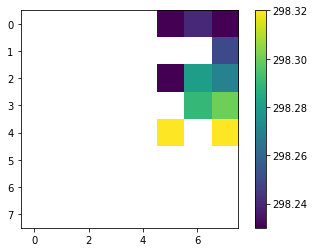

In [86]:
plt.imshow(Y_orig[10, 60, :, :], vmin=vmin, vmax=vmax)
plt.colorbar()

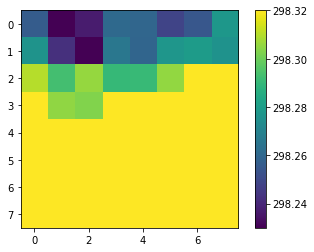

In [87]:
plt.imshow(Y_pred_orig[10, 60, :, :], vmin=vmin, vmax=vmax)
plt.colorbar()

In [29]:
def mse_loss(y_true, y_pred):
    # shape = list(tf.shape(y_true).numpy())
    # shape.append(1)
    # tf.reshape(y_true, shape)
    # tf.reshape(y_pred, shape)
    invalid_data = tf.math.is_nan(y_true)
    valid_data = ~invalid_data
    
    num_valid = tf.math.reduce_sum(tf.cast(valid_data, 'float32'))
    num_invalid = tf.math.reduce_sum(tf.cast(invalid_data, 'float32'))
    num_tot = num_valid + num_invalid
    #print(num_valid, num_invalid, num_tot)
    
    y_true_loss = tf.where(invalid_data, tf.zeros_like(y_true), y_true) #change all nans to 0's
    y_pred_loss = tf.where(invalid_data, tf.zeros_like(y_pred), y_pred)
    
    sum_errors = num_tot * keras.losses.MeanSquaredError(reduction="sum_over_batch_size")(y_true_loss, y_pred_loss)
    mse = sum_errors/(num_valid + keras.backend.epsilon())
    
    return mse

In [17]:
print(Y_pred.shape)

(1, 120, 8, 8, 1)


In [11]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120, 8, 8,   0           []                               
                                1)]                                                               
                                                                                                  
 conv3d (Conv3D)                (None, 120, 4, 4, 1  272         ['input_1[0][0]']                
                                6)                                                                
                                                                                                  
 batch_normalization (BatchNorm  (None, 120, 4, 4, 1  64         ['conv3d[0][0]']                 
 alization)                     6)                                                          

In [12]:
model.evaluate(val_gen)

 16/505 [..............................] - ETA: 4:59 - loss: 1.0506

KeyboardInterrupt: 

In [15]:
base_model = create_ConvLSTM()
base_model.compile(loss = mse_loss, optimizer = keras.optimizers.Adam(learning_rate = 5e-4))

In [16]:
base_model.evaluate(val_gen)

236/505 [=============>................] - ETA: 3:30 - loss: 43.7256

KeyboardInterrupt: 

In [18]:
import pandas as pd
df = pd.read_csv('convlstm_sst_attempt_log.csv')

In [22]:
df

,epoch,loss,lr,val_loss
0,0,2.648569,0.0005,1.147033
1,1,1.031062,0.0005,2.530617
2,2,0.849442,0.0005,2.447093
3,3,0.696124,0.0005,2.708610
4,4,0.572079,0.0005,3.133433
5,5,0.502705,0.0005,3.034295
6,6,0.451440,0.0005,2.139789
7,7,0.411267,0.0005,0.638143
8,8,0.374885,0.0005,3.576504
9,9,0.351505,0.0005,0.756722


<AxesSubplot:>

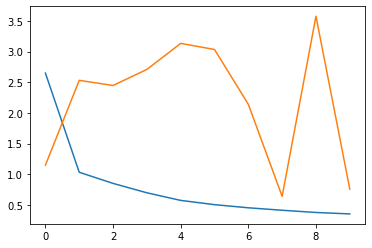

In [23]:
df['loss'].plot()
df['val_loss'].plot()

from src.mod

In [2]:
raw_data()

  Using cached podaac_data_subscriber-1.13.1-py3-none-any.whl (25 kB)
  Using cached tenacity-8.2.2-py3-none-any.whl (24 kB)
  Using cached packaging-23.1-py3-none-any.whl (48 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
[2023-06-20 03:42:15,107] {podaac_data_downloader.py:166} INFO - NOTE: Making new data directory at ./raw_data(This is the first run.)
[2023-06-20 03:43:02,838] {podaac_data_downloader.py:267} INFO - Found 1390 total files to download
[2023-06-20 03:43:08,779] {podaac_data_downloader.py:310} INFO - 2023-06-20 03:43:08.779125 SUCCESS: https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/ABI_G16-STAR-L2P-v2.70/20180228230000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
[2023-06-20 03:43:10,591] {podaac_data_downloader.py:310} INFO - 2023-06-20 03:43:10.591027 SUCCESS: https://archive.podaac.earthdata.nasa.gov/podaac-o

Traceback (most recent call last):
  File "/srv/conda/envs/notebook/bin/podaac-data-downloader", line 8, in <module>
    sys.exit(main())
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/subscriber/podaac_data_downloader.py", line 348, in main
    run()
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/subscriber/podaac_data_downloader.py", line 306, in run
    pa.download_file(f,output_path)
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/subscriber/podaac_access.py", line 343, in download_file
    urlretrieve(remote_file, output_path)
  File "/srv/conda/envs/notebook/lib/python3.10/urllib/request.py", line 257, in urlretrieve
    with tfp:
KeyboardInterrupt


In [2]:
full_data()

0 data/raw_data/20180101000000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
1 data/raw_data/20180101010000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
2 data/raw_data/20180101020000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
3 data/raw_data/20180101030000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
4 data/raw_data/20180101040000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
5 data/raw_data/20180101050000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
6 data/raw_data/20180101060000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
7 data/raw_data/20180101070000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
8 data/raw_data/20180101080000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
9 data/raw_data/20180101090000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
10 data/raw_data/20180101100000-STAR-L2P_GHRSST-SSTsubskin-A

/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


24 data/raw_data/20180102000000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
25 data/raw_data/20180102010000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
26 data/raw_data/20180102020000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
27 data/raw_data/20180102030000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
28 data/raw_data/20180102040000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
29 data/raw_data/20180102050000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
30 data/raw_data/20180102060000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
31 data/raw_data/20180102070000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
32 data/raw_data/20180102080000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
33 data/raw_data/20180102090000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
34 data/raw_data/20180102100000-STAR-L2P_GHRSST-SS

/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


48 data/raw_data/20180103000000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
49 data/raw_data/20180103010000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
50 data/raw_data/20180103020000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
51 data/raw_data/20180103030000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
52 data/raw_data/20180103040000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
53 data/raw_data/20180103050000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
54 data/raw_data/20180103060000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
55 data/raw_data/20180103070000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
56 data/raw_data/20180103080000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
57 data/raw_data/20180103090000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
58 data/raw_data/20180103100000-STAR-L2P_GHRSST-SS

/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


72 data/raw_data/20180104000000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
73 data/raw_data/20180104010000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
74 data/raw_data/20180104020000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
75 data/raw_data/20180104030000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
76 data/raw_data/20180104040000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
77 data/raw_data/20180104050000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
78 data/raw_data/20180104060000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
79 data/raw_data/20180104070000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
80 data/raw_data/20180104080000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
81 data/raw_data/20180104090000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
82 data/raw_data/20180104100000-STAR-L2P_GHRSST-SS

/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


96 data/raw_data/20180105000000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
97 data/raw_data/20180105010000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
98 data/raw_data/20180105020000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
99 data/raw_data/20180105030000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
100 data/raw_data/20180105040000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
101 data/raw_data/20180105050000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
102 data/raw_data/20180105060000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
103 data/raw_data/20180105070000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
104 data/raw_data/20180105080000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
105 data/raw_data/20180105090000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
106 data/raw_data/20180105100000-STAR-L2P_GH

/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


120 data/raw_data/20180106000000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
121 data/raw_data/20180106010000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
122 data/raw_data/20180106020000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
123 data/raw_data/20180106030000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
124 data/raw_data/20180107060000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
125 data/raw_data/20180107070000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
126 data/raw_data/20180107080000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
127 data/raw_data/20180107090000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
128 data/raw_data/20180107100000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
129 data/raw_data/20180107110000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
130 data/raw_data/20180107120000-STAR-L2

/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


145 data/raw_data/20180108030000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
146 data/raw_data/20180108040000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
147 data/raw_data/20180108050000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
148 data/raw_data/20180108060000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
149 data/raw_data/20180108070000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
150 data/raw_data/20180108080000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
151 data/raw_data/20180108090000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
152 data/raw_data/20180108100000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
153 data/raw_data/20180108110000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
154 data/raw_data/20180108120000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc
155 data/raw_data/20180108130000-STAR-L2

/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


KeyboardInterrupt: 

In [3]:
import tensorflow as tf
import numpy as np

In [15]:
arr = np.array([[1, 2, 3], [np.nan, 2, 1], [4, 5, 8]])
print(arr)

[[ 1.  2.  3.]
 [nan  2.  1.]
 [ 4.  5.  8.]]


In [16]:
tensor = tf.convert_to_tensor(arr)

In [17]:
print(tensor)

tf.Tensor(
[[ 1.  2.  3.]
 [nan  2.  1.]
 [ 4.  5.  8.]], shape=(3, 3), dtype=float64)


In [18]:
print(tensor[0, 2])

tf.Tensor(3.0, shape=(), dtype=float64)


In [22]:
print(tf.cast(~tf.math.is_nan(tensor), tf.float32))

tf.Tensor(
[[1. 1. 1.]
 [0. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32)


In [4]:
import tensorflow as tf
import numpy as np

In [6]:
print(tf.constant(np.nan))

tf.Tensor(nan, shape=(), dtype=float32)


In [7]:
print(tf.constant(0.0))

tf.Tensor(0.0, shape=(), dtype=float32)


In [30]:
t = (tf.constant(np.array([[1, np.nan, 1], [np.nan, 1, 2]])))

In [19]:
t -= t

In [31]:
print(t)

tf.Tensor(
[[ 1. nan  1.]
 [nan  1.  2.]], shape=(2, 3), dtype=float64)


In [32]:
t2 = tf.where(tf.math.is_nan(t), tf.zeros_like(t), t)

In [33]:
print(t2)

tf.Tensor(
[[1. 0. 1.]
 [0. 1. 2.]], shape=(2, 3), dtype=float64)


In [ ]:
X = np.array([[0, 0, 1], [1, 2, 0], [2, 1.5, 0]])